In [1]:
import os
import itertools
from time import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import io
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
category = os.listdir("101_ObjectCategories/")

In [3]:
print category

['accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'Faces', 'Faces_easy', 'ferry', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'Leopards', 'llama', 'lobster', 'lotus', 'mayfly', 'menorah', 'metronome', 'minaret', 'Motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'chair', 'flamingo', 'mandolin', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ball', 'stapler

In [4]:
# Counting items(number of images) in each category
item_count = []
for name in category:
    path = "./101_ObjectCategories/" + name
    temp = os.listdir(path)
    item_count.append(len(temp))

## Breaking datset to training and validation sets for STANDALONE SVM CLASSIFIER

In [5]:
# lists for training, validation data and labels for both training and validation images
train_list = []
validation_list = [] 
label_train = []
label_valid = []

# variable to iterate through item_count list
i = 0 
for name in category:
    # variable(int) to store the count of 90% of total images in a specific category
    # PERCENTAGE OF TRAIN AND VALIDATION COUNTS CAN BE CHANGED IN ORDER TO IMPROVE RESULTS
    count1 = int(0.05 * item_count[i])
    # for creating validation set of limited size 
    count2 = 3 * count1
    i += 1
    
    path = "./101_ObjectCategories/" + name
    temp = os.listdir(path)
    
    # variable to iterate through count(int) images
    j = 0
    for item in temp:
        # PATHS to images are stored in train_list so that we can directly access them for manipulation
        st = path + "/" + item
        # IF j is less than count append in TRAIN_LIST, ELSE append in VALIDATION_LIST
        if j <= count1:
            train_list.append(st)
            # Creating label vector by appending category of specific image CORRESPONDING TO EACH IMAGE IN 
            # TRAINING MATRIX
            label_train.append(name)
        elif j <= count2:
            validation_list.append(st)
            label_valid.append(name)
        j += 1
    

In [6]:
# Total number of images splitted into two lists of length 6127(train) and 2550(valid)
print len(train_list), len(validation_list)
print len(label_train), len(label_valid)

487 772
487 772


In [7]:
print train_list[0:20]
print
print validation_list[0:20]

['./101_ObjectCategories/accordion/image_0024.jpg', './101_ObjectCategories/accordion/image_0001.jpg', './101_ObjectCategories/accordion/image_0002.jpg', './101_ObjectCategories/airplanes/image_0370.jpg', './101_ObjectCategories/airplanes/image_0001.jpg', './101_ObjectCategories/airplanes/image_0002.jpg', './101_ObjectCategories/airplanes/image_0003.jpg', './101_ObjectCategories/airplanes/image_0004.jpg', './101_ObjectCategories/airplanes/image_0005.jpg', './101_ObjectCategories/airplanes/image_0006.jpg', './101_ObjectCategories/airplanes/image_0007.jpg', './101_ObjectCategories/airplanes/image_0008.jpg', './101_ObjectCategories/airplanes/image_0009.jpg', './101_ObjectCategories/airplanes/image_0010.jpg', './101_ObjectCategories/airplanes/image_0011.jpg', './101_ObjectCategories/airplanes/image_0012.jpg', './101_ObjectCategories/airplanes/image_0013.jpg', './101_ObjectCategories/airplanes/image_0014.jpg', './101_ObjectCategories/airplanes/image_0015.jpg', './101_ObjectCategories/airpla

In [8]:
# Currently reading JUST ONE IMAGE
image_mat = io.imread(train_list[50], as_grey=True)

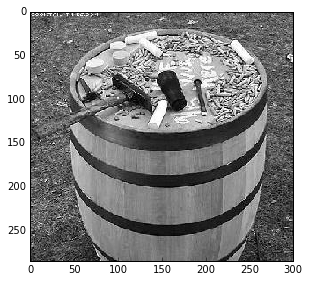

In [9]:
io.imshow(image_mat)

In [10]:
image_mat

array([[ 0.39754549,  0.28774157,  0.24068275, ...,  0.4331898 ,
         0.37828784,  0.34691529],
       [ 0.30734941,  0.52303569,  0.51911412, ...,  0.46848392,
         0.45671922,  0.30769961],
       [ 0.53480039,  0.41323176,  0.94264353, ...,  0.26848392,
         0.20573882,  0.19005255],
       ..., 
       [ 0.09108275,  0.3173949 ,  0.24680667, ...,  0.27765843,
         0.31295255,  0.24460431],
       [ 0.16445373,  0.26249294,  0.29973647, ...,  0.27849176,
         0.43086745,  0.3877302 ],
       [ 0.33308118,  0.33700275,  0.36640314, ...,  0.23813725,
         0.37482667,  0.13561098]])

In [11]:
image_mat[110]

array([ 0.40960784,  0.48411765,  0.37039216,  0.36647059,  0.29588235,
        0.12668941,  0.39335608,  0.28355216,  0.45610118,  0.25553569,
        0.42808471,  0.58886902,  0.48522667,  0.2930698 ,  0.47738353,
        0.36365804,  0.37823529,  0.40568627,  0.35078431,  0.59335608,
        0.41688549,  0.39138392,  0.40146706,  0.52303569,  0.38716471,
        0.61461569,  0.50705176,  0.51767765,  0.35661059,  0.55661059,
        0.43896353,  0.57229686,  0.3659051 ,  0.28747373,  0.38943451,
        0.50118784,  0.37177608,  0.21099176,  0.38045255,  0.16476627,
        0.37147059,  0.39892157,  0.34204745,  0.35381216,  0.51737922,
        0.72522235,  0.1565949 ,  0.19581059,  0.30001137,  0.20365373,
        0.16614235,  0.22244314,  0.23842706,  0.20680941,  0.21018039,
        0.26398118,  0.26093059,  0.23601725,  0.28224275,  0.26769529,
        0.48927529,  0.63494667,  0.4937702 ,  0.44084039,  0.51030549,
        0.47893294,  0.54362745,  0.51420431,  0.52622902,  0.58

### Building a complete matrix from images in training data

In [20]:
count = 0
train_matrix = []
for train_item in train_list:

    if count == 1:
        break
    count += 1
    
    # Read image as RGB pixel matrix
    image_mat_train = io.imread(train_item, as_grey=True)
    
    # Resizing image
    image_mat_train = resize(image_mat_train, (300, 167))

    # Flatten image
    image_vector_train = []
    for i in range(0, len(image_mat_train)):
        for j in range(0, len(image_mat_train[0])):
            image_vector_train.append(image_mat_train[i][j])
            
    train_matrix.append(image_vector_train)

## Building matrix for images in validation_list

In [66]:
count = 0
validation_matrix = []
for valid_item in validation_list:

    # Extra code to limit the execution of for loop
    if count == 100:
        break
    count += 1
    
    # Read image as RGB pixel matrix
    image_mat_valid = io.imread(valid_item, as_grey=True)
    
    # Resizing image [Chances to increase accuracy]
    image_mat_valid = resize(image_mat_valid, (300, 167))

    # Flatten image
    image_vector_valid = []
    for i in range(0, len(image_mat_valid)):
        for j in range(0, len(image_mat_valid[0])):
            image_vector_valid.append(image_mat_valid[i][j])
            
    validation_matrix.append(image_vector_valid)

## Applying PCA for dimensionality reduction

In [67]:
# Keeping track of time taken by PCA algorithm
t0 = time()
pca = PCA(n_components=50, whiten=True).fit(train_matrix)
print "Time taken by PCA %0.3fs::" % (time() - t0)
pca.explained_variance_ratio_

Time taken by PCA 9.932s::


array([ 0.43200967,  0.06064143,  0.04114025,  0.03087182,  0.02522533,
        0.02219702,  0.01854992,  0.0151817 ,  0.01301446,  0.01109914,
        0.01066356,  0.00928866,  0.00813819,  0.00801341,  0.0077209 ,
        0.00712187,  0.00657994,  0.00609384,  0.00571662,  0.00518735,
        0.00502336,  0.00488777,  0.0044839 ,  0.00420702,  0.00386453,
        0.0038157 ,  0.00351508,  0.00333841,  0.00323964,  0.00305814,
        0.00299331,  0.00296569,  0.00283341,  0.00277736,  0.00270912,
        0.00258844,  0.00251273,  0.0023778 ,  0.00231724,  0.00220875,
        0.00213304,  0.00211356,  0.00207169,  0.00197947,  0.00195113,
        0.00191412,  0.00182568,  0.00178523,  0.00175345,  0.00172191])

In [68]:
# projecting the input data on the eigenfaces orthonormal basis
t0 = time()
X_train_pca = pca.transform(train_matrix)
X_test_pca = pca.transform(validation_matrix)
print "Time taken %0.3fs" % (time() - t0)

Time taken 16.863s


In [69]:
# reduced the number of dimensions from 50100 to 50

print len(X_train_pca), len(X_train_pca[0])
print len(X_test_pca), len(X_test_pca[0])
print len(train_matrix), len(train_matrix[0])
print len(validation_matrix), len(validation_matrix[0])

487 50
772 50
487 50100
772 50100


## Training SVM classifier

In [71]:
# GridSearchCV search over all the possible combinations of parameters of SVM classifier and choose the best one

t0 = time()
# Here 'C' and 'gamma' are parameters provided as argument to SVM classifier
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
classifier = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid)

classifier = classifier.fit(X_train_pca, label_train)
print "Time taken for training SVM classifier %0.3fs\n" % (time() - t0)

# Display the optimal value of parameters found by grid search
print "Best Estimator found by grid search ::"
print classifier.best_estimator_

/home/a/miniconda2/envs/alt-env/lib/python2.7/site-packages/sklearn/model_selection/_split.py:579: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Time taken for training SVM classifier 38.007s

Best Estimator found by grid search ::
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


## Quantitative evaluation of model on test  data

In [72]:
t0 = time()
# Predicting results on test data
results = classifier.predict(X_test_pca)
print "Predicted output in %0.3fs " % (time() - t0)

Predicted output in 0.390s 


In [89]:
# [results] list and [label_valid] list can be compared to check the correct and incorrect predictions made by our 
# classifier
print results[380:400]
print 
print label_valid[380:400]   # REMEMBER TO REMOVE LIMIT 

['bonsai' 'ibis' 'pigeon' 'pizza' 'cougar_body' 'hawksbill' 'elephant'
 'bass' 'ketch' 'Faces' 'crocodile_head' 'metronome' 'airplanes' 'watch'
 'scorpion' 'watch' 'electric_guitar' 'elephant' 'car_side' 'starfish']

['hawksbill', 'hawksbill', 'hawksbill', 'hawksbill', 'hawksbill', 'hawksbill', 'hawksbill', 'hawksbill', 'hawksbill', 'hawksbill', 'headphone', 'headphone', 'headphone', 'headphone', 'hedgehog', 'hedgehog', 'hedgehog', 'hedgehog', 'helicopter', 'helicopter']


## Mean Accuracy of the classifier

In [90]:
accu = classifier.score(X_test_pca, label_valid) # REMEMBER TO REMOVE LIMIT
print accu

0.29792746114


## Predicting a single result using SVM classifier

In [75]:
def make_prediction(pos):
    img = io.imread(validation_list[pos], as_grey=True)
    original = img
    
    # Flatten the image to get an Image vector
    img = resize(img, (300, 167))
    flat_image_vector = []
    for i in range(0, len(img)):
        for j in range(0, len(img[0])):
            flat_image_vector.append(img[i][j])
            
    # Convert the vector into a numpy array and fit it using pca  
    flat_image_array = np.array(flat_image_vector).reshape(1,-1)
    image_transform = pca.transform(flat_image_array)
    res = classifier.predict(image_transform)
    print "Predicted class is mentioned below:"
    print res[0]
    
    print "\n\n"
    print "Chosen image is displayed below:"
    io.imshow(original)

Predicted class is mentioned below:
Motorbikes



Chosen image is displayed below:


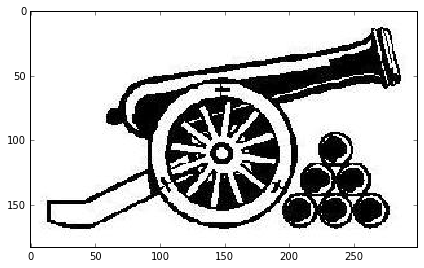

In [78]:
make_prediction(150)

## Qualitative Evaluation of Model using matplotlib

### Confusion Matrix

In [79]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


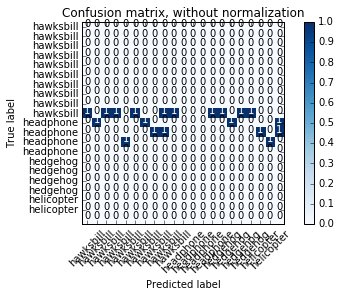

In [99]:
"""
Using np.unique() function to plot a particular class only once. Number of classes will increase on training the
complete dataset. To include all the classes remove the LIMITS.
CONFUSION MATRIX IS GIVING WRONG OUTPUT DUE TO THE LIMITS.
""" 

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_valid[380:400], results[380:400])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_valid[380:400],
                      title='Confusion matrix, without normalization')

plt.show()

### Classification Report

In [100]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, 
                correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(figure_width, figure_height))
    
def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on http://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, 
                figure_height, correct_orientation, cmap=cmap)
    


                 precision    recall  f1-score   support

      accordion       0.43      0.25      0.32        12
      airplanes       1.00      0.76      0.86        42
         anchor       0.00      0.00      0.00         0
            ant       0.00      0.00      0.00         0
         barrel       0.00      0.00      0.00         0
           bass       0.00      0.00      0.00         0
         beaver       0.00      0.00      0.00         0
      binocular       0.00      0.00      0.00         0
         bonsai       0.00      0.00      0.00         0
          brain       0.00      0.00      0.00         0
   brontosaurus       0.00      0.00      0.00         0
         buddha       0.00      0.00      0.00         0
      butterfly       0.00      0.00      0.00         0
         camera       0.00      0.00      0.00         0
         cannon       0.00      0.00      0.00         0
       car_side       0.00      0.00      0.00         0
    ceiling_fan       0.00    

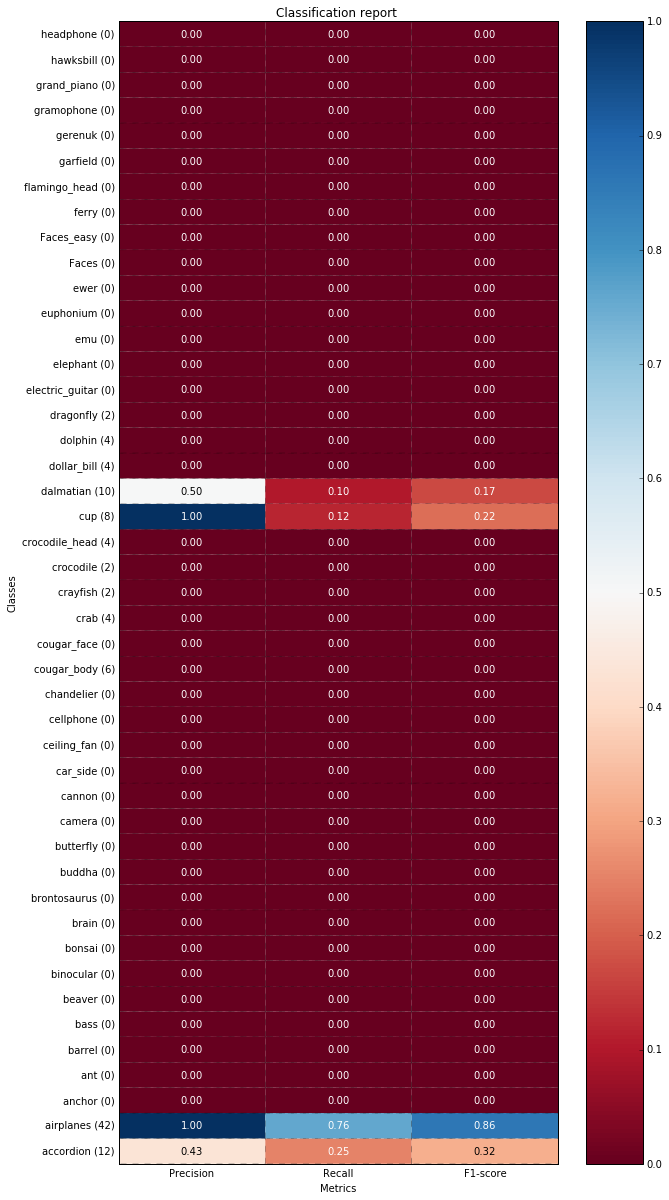

In [103]:
report = classification_report(label_valid[300:400], results[300:400], target_names=category)
print report
plot_classification_report(report)